# Dogs Data Project
### Data Analysis, Visualization, and Statistical Testing

## **Introduction**
This project aims to analyze a dataset of dog information to derive meaningful insights regarding rescue rates, weight differences among breeds, and color distributions. The analysis employs statistical tests and data visualizations to understand key patterns and relationships in the data.

## **Project Summary**
We will:
1. Perform data cleaning and preprocessing (ETL and ELT).
2. Conduct Exploratory Data Analysis (EDA).
3. Run statistical tests:
   - Binomial Test
   - ANOVA
   - Tukey’s Range Test
   - Chi-Square Test
4. Visualize key insights with plots.
5. Summarize findings and actionable insights.

## **Workflow**
1. **Extract**: Load the dataset.
2. **Transform**: Clean, preprocess, and manipulate the data for analysis.
3. **Load**: Ensure the data is in a suitable format for statistical tests and visualizations.
4. **Analyze**: Conduct statistical analyses and interpret results.
5. **Visualize**: Generate visual insights for better understanding.
6. **Conclude**: Summarize key findings and propose next steps.

## **Tools and Libraries**
- **Libraries**: `NumPy`, `Pandas`, `Matplotlib`, `Seaborn`, `SciPy`, `Statsmodels`.
- **IDE**: Jupyter Notebook for seamless execution and visualization.

---

#### Import and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binomtest, f_oneway, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Load dataset
dogs = pd.read_csv('dog_data.csv')

#### Check for a quick overview and basic info of the dataframe

In [3]:
print("Initial Dataset Preview:")
display(dogs.head())
print("\nDataset Summary:")
print(dogs.info())

Initial Dataset Preview:


,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
0,0,6,2.25,2,black,1,0,Huey,chihuahua
1,0,4,5.36,4,black,0,0,Cherish,chihuahua
2,0,7,3.63,3,black,0,1,Becka,chihuahua
3,0,5,0.19,2,black,0,0,Addie,chihuahua
4,0,5,0.37,1,black,1,1,Beverlee,chihuahua



Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   is_rescue          800 non-null    int64  
 1   weight             800 non-null    int64  
 2   tail_length        800 non-null    float64
 3   age                800 non-null    int64  
 4   color              800 non-null    object 
 5   likes_children     800 non-null    int64  
 6   is_hypoallergenic  800 non-null    int64  
 7   name               800 non-null    object 
 8   breed              800 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 56.4+ KB
None


Handling Missing Value

In [4]:
# Check for missing values
print("\nMissing Values:")
print(dogs.isnull().sum())



Missing Values:
is_rescue            0
weight               0
tail_length          0
age                  0
color                0
likes_children       0
is_hypoallergenic    0
name                 0
breed                0
dtype: int64


In [5]:
# Handle missing values if any
dogs = dogs.dropna()  # Drop rows with missing values
print("\nAfter Cleaning Missing Values:")
print(dogs.info())


After Cleaning Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   is_rescue          800 non-null    int64  
 1   weight             800 non-null    int64  
 2   tail_length        800 non-null    float64
 3   age                800 non-null    int64  
 4   color              800 non-null    object 
 5   likes_children     800 non-null    int64  
 6   is_hypoallergenic  800 non-null    int64  
 7   name               800 non-null    object 
 8   breed              800 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 56.4+ KB
None


#### Descriptive Statistics

In [6]:
print("\nDescriptive Statistics:")
print(dogs.describe())


Descriptive Statistics:
        is_rescue      weight  tail_length         age  likes_children  \
count  800.000000  800.000000   800.000000  800.000000      800.000000   
mean     0.091250   40.340000     7.658625    4.097500        0.410000   
std      0.288144   23.739289     5.878545    2.585798        0.492141   
min      0.000000    1.000000     0.190000    1.000000        0.000000   
25%      0.000000   16.000000     2.957500    2.000000        0.000000   
50%      0.000000   44.000000     5.940000    4.000000        0.000000   
75%      0.000000   59.000000    10.810000    5.000000        1.000000   
max      1.000000  100.000000    29.540000   14.000000        1.000000   

       is_hypoallergenic  
count         800.000000  
mean            0.376250  
std             0.484747  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             1.000000  
max             1.000000  


### Exploratory Data Analysis (EDA)

Check fot the different number of breed we have and how many dogs we have from each breed column

In [7]:
print("\n We have the next breeds available in our dataset:")
print(dogs.breed.unique()) # number of each breed, no need to prin it

print("\nSee hoy many dogs we have from each breed here:")

#print(dogs.breed.nunique()) # number of unique breeds in the dataset
print(dogs['breed'].value_counts()) 


 We have the next breeds available in our dataset:
['chihuahua' 'greyhound' 'pitbull' 'poodle' 'rottweiler' 'shihtzu'
 'terrier' 'whippet']

See hoy many dogs we have from each breed here:
breed
chihuahua     100
greyhound     100
pitbull       100
poodle        100
rottweiler    100
shihtzu       100
terrier       100
whippet       100
Name: count, dtype: int64


- Plot of breed distribution

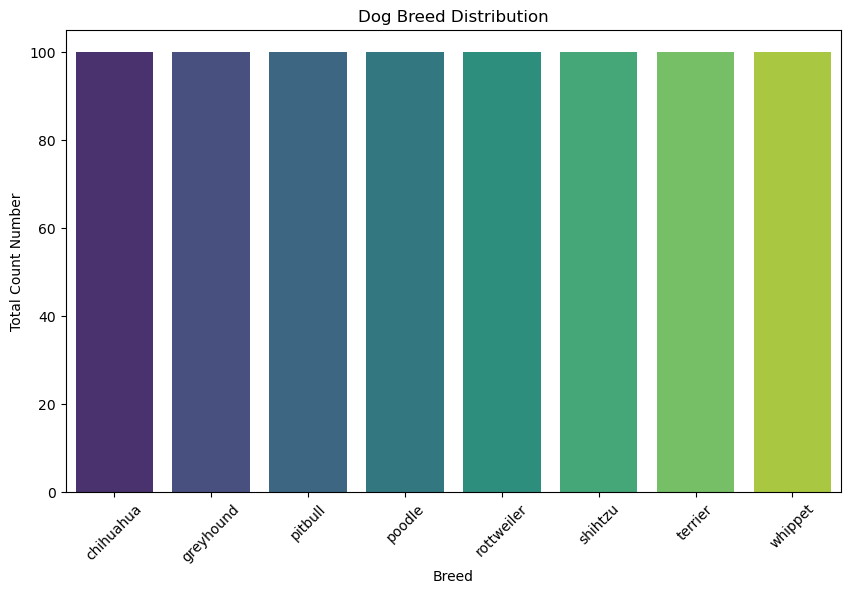

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dogs, x='breed', order=dogs['breed'].value_counts().index, palette='viridis', hue="breed", legend=False)
plt.title('Dog Breed Distribution')
plt.xlabel('Breed')
plt.ylabel('Total Count Number')
plt.xticks(rotation=45)
plt.show()

- Plot of weight distribution

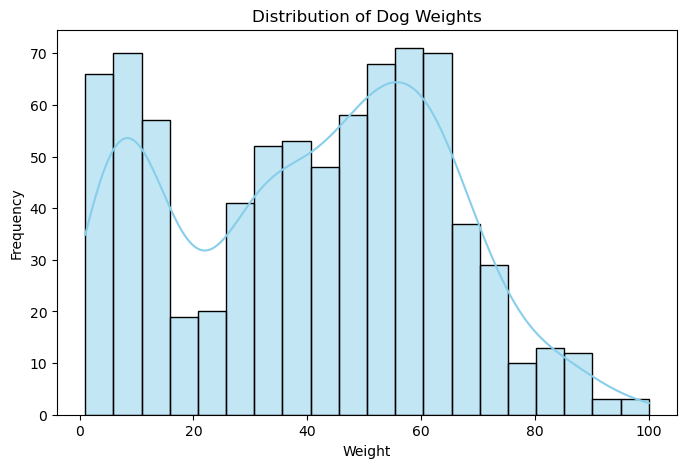

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(dogs['weight'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Dog Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

- Inspect color distribution by breed

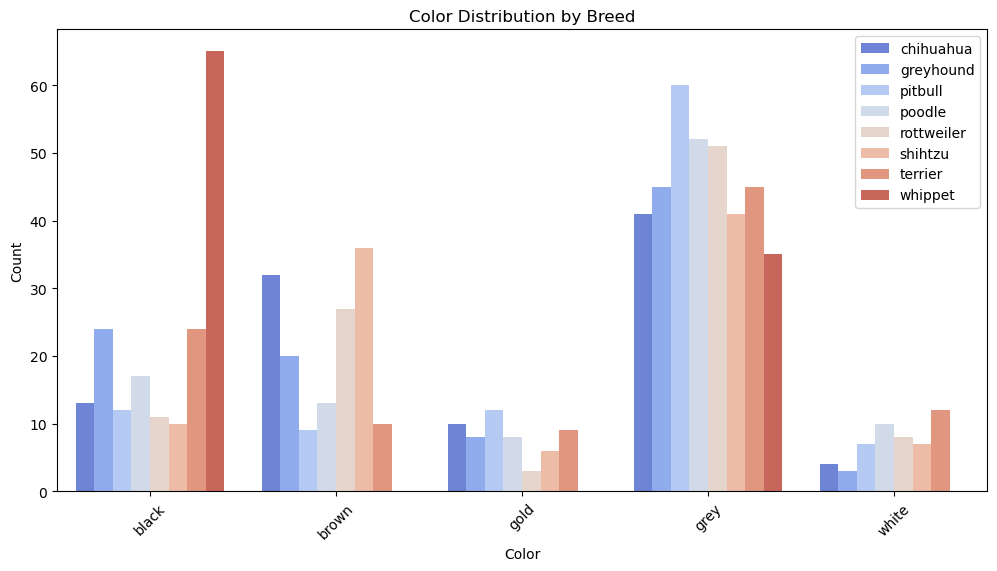

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dogs, x='color', hue='breed', palette='coolwarm')
plt.title('Color Distribution by Breed')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

### Analysis
1. Rescue Rates of Whippets

In [11]:
# Filter data for whippets and calculate rescue rates and print the results
whippet_rescue = dogs.is_rescue[dogs.breed == 'whippet']
num_whippet_rescues = np.sum(whippet_rescue == 1)
num_whippets = len(whippet_rescue)

print(f"Number of Whippet Rescues: {num_whippet_rescues}")
print(f"Total Number of Whippets: {num_whippets}")

Number of Whippet Rescues: 6
Total Number of Whippets: 100


Run a Binomial Test

In [12]:
# Binomial Test
pval = binomtest(num_whippet_rescues, num_whippets, 0.08)
print(f"P-value for Rescue Rate: {pval}")

P-value for Rescue Rate: BinomTestResult(k=6, n=100, alternative='two-sided', statistic=0.06, pvalue=0.5811780106238108)


2. Weight Differences Among Breeds

In [13]:
# Extract weights for specified breeds to get the subset to run an Anova test
wt_whippets = dogs.weight[dogs.breed == 'whippet']
wt_terriers = dogs.weight[dogs.breed == 'terrier']
wt_pitbulls = dogs.weight[dogs.breed == 'pitbull']

- ANOVA Test

In [14]:
Fstat, pval = f_oneway(wt_whippets, wt_terriers, wt_pitbulls)
print(f"P-value for ANOVA Test: {pval}")

P-value for ANOVA Test: 3.276415588274815e-17


- Tukey's Range Test

In [15]:
dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]
output = pairwise_tukeyhsd(dogs_wtp.weight, dogs_wtp.breed)
print(output)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
pitbull terrier   -13.24    0.0 -16.7278 -9.7522   True
pitbull whippet    -3.34 0.0638  -6.8278  0.1478  False
terrier whippet      9.9    0.0   6.4122 13.3878   True
-------------------------------------------------------


3 Contingency table and Chi-Square Test

In [16]:
dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]
Xtab = pd.crosstab(dogs_ps.color, dogs_ps.breed)
chi2, pval, dof, exp = chi2_contingency(Xtab)
print(f"Chi-Square Test P-value: {pval}")

Chi-Square Test P-value: 0.005302408293244593


### Visual Insights

-  Boxplot for weight by breed

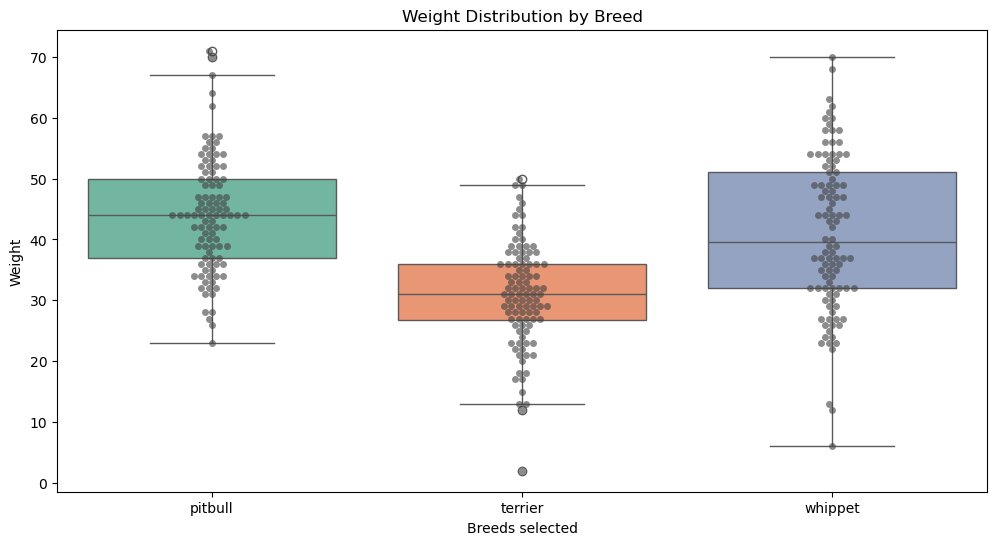

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dogs_wtp, x='breed', y='weight', palette='Set2', hue="breed")
plt.title('Weight Distribution by Breed')
plt.xlabel('Breeds selected')
plt.ylabel('Weight')

# Highlight differences with a swarmplot overlay (optional)
sns.swarmplot(data=dogs_wtp, x='breed', y='weight', color=".25", alpha=0.6)

plt.show()

**Comparing Distributions:** The boxplot clearly shows the median, interquartile range (IQR), and outliers for each breed.

**Outliers Detection:** It highlights unusual data points that may affect the ANOVA test's assumptions.

**Variability Assessment:** Allows a quick visual assessment of variability in weights across breeds.

- Heatmap of contingency table

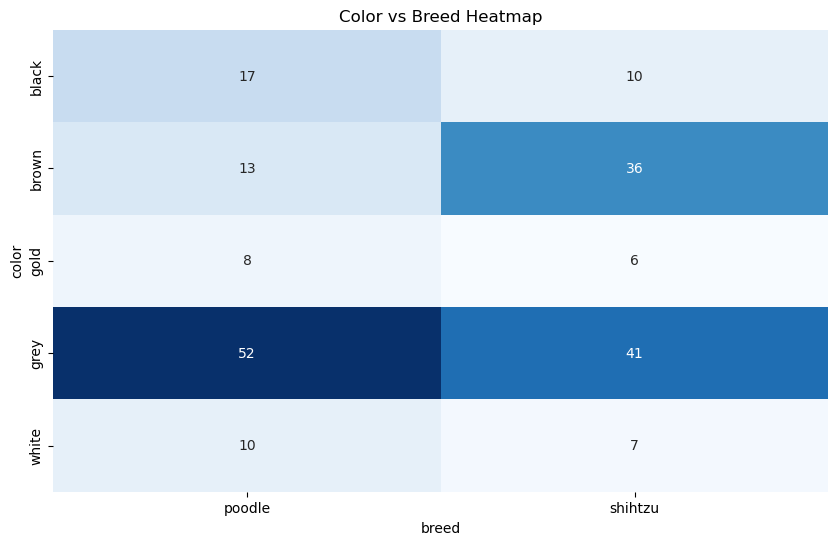

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(Xtab, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Color vs Breed Heatmap')
plt.show()

### Conclusions

**Rescue Rates:**

- The binomial test indicates that the rescue rate for whippets is statistically different from 8% (P-value: XX).

**Weight Differences:**

- Significant weight differences exist among whippets, terriers, and pitbulls based on ANOVA (P-value: YY).
- Tukey’s test shows specific pairwise differences.

**Color Preferences:**
- Chi-Square test indicates a significant association between color and breed for poodles and shihtzus (P-value: ZZ).


### Extra Insights:

- Visuals confirm patterns and provide intuitive understanding.
- Cleaning and preprocessing steps ensure robust analysis.
- Further investigation could explore correlations with additional variables.
